<a href="https://colab.research.google.com/github/svazrala04/Customer-query-label-prediction/blob/main/TextAnalyticsA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Customer_Service_Questions_Multiclass.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df.dtypes

question    object
topic       object
dtype: object

In [ ]:
df.shape

(5000, 2)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Text Preprocessing

In [ ]:
from nltk.corpus.reader.tagged import word_tokenize
import re


In [ ]:
def clean_text(question):
  for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]{|}~\n\t':
    question=question.replace(char, ' ')
  question=question.lower()
  question= re.sub(r'\d+','',question)
  word_list=word_tokenize(question)
  stop_words= stopwords.words('english')
  words_list=[w for w in word_list if w not in stop_words]
  words_list = [lemmatizer.lemmatize(w) for w in words_list]
  final_text=' '.join([w for w in words_list])
  return final_text

In [ ]:
df['clean_question']=df['question'].apply(clean_text)

In [ ]:
def tokenize_text(text):
  word_list=word_tokenize(text)
  return word_list

In [ ]:
df['tokenized_cleanquestion']=df['clean_question'].apply(tokenize_text)

In [ ]:
df.head(40)

,question,topic,clean_question,tokenized_cleanquestion
0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions,hi sign email list select get email exclusivel...,"[hi, sign, email, list, select, get, email, ex..."
1,I'm going to be out of the country for about a...,Shipping,going country week travel going getting animal...,"[going, country, week, travel, going, getting,..."
2,I was wondering if you'd be able to overnight ...,Shipping,wondering able overnight jacket item trenton nj,"[wondering, able, overnight, jacket, item, tre..."
3,The Swingline electronic stapler (472555) look...,Shipping,swingline electronic stapler look really great...,"[swingline, electronic, stapler, look, really,..."
4,I think this cosmetic bag would work great for...,Shipping,think cosmetic bag would work great however kn...,"[think, cosmetic, bag, would, work, great, how..."
5,I'm going to be out of the state for about a w...,Shipping,going state week travel going getting wristlet...,"[going, state, week, travel, going, getting, w..."
6,I'm going to be out of the state for about a w...,Shipping,going state week travel going getting venetian...,"[going, state, week, travel, going, getting, v..."
7,The Stanley Bostitch electronic stapler (63460...,Shipping,stanley bostitch electronic stapler look reall...,"[stanley, bostitch, electronic, stapler, look,..."
8,When is the estimated delivery date if I was t...,Shipping,estimated delivery date order creatine powder ...,"[estimated, delivery, date, order, creatine, p..."
9,I was wondering if you'd be able to overnight ...,Shipping,wondering able overnight trench coat item numb...,"[wondering, able, overnight, trench, coat, ite..."


# Creating Train and Test data with TF-IDF Vectorizer on tokenized text

In [ ]:
df['category_id'] = df['topic'].factorize()[0]

In [ ]:
df.groupby('topic').question.count()

topic
Omnichannel               450
Product Availability      833
Product Comparison        806
Product Specifications    839
Returns & Refunds         768
Sales/Promotions          505
Shipping                  799
Name: question, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

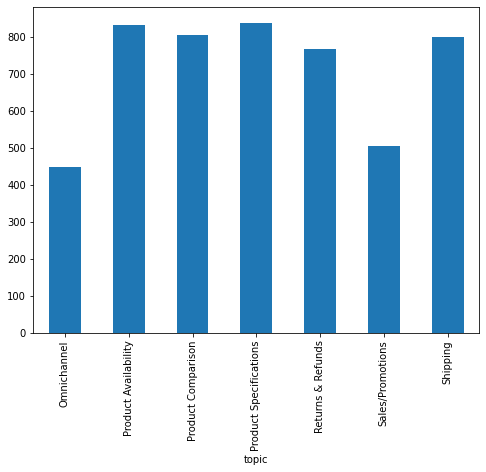

In [ ]:
fig=plt.figure(figsize=(8,6))
df.groupby('topic').question.count().plot.bar(ylim=0)
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
randomstate=42

X_train, X_test, y_train, y_test = train_test_split(df['clean_question'], df['topic'], test_size=0.2, random_state=randomstate)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000,), (4000,), (1000,), (1000,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['clean_question'])
Xtrain_tfidf =  tfidf_vect.transform(X_train)
Xtest_tfidf =  tfidf_vect.transform(X_test)

# TF-IDF of unigrams

In [ ]:
tfidf_unigram = TfidfVectorizer(ngram_range=(1,1))
tfidf_unigram.fit(X_train)

X_train_tfidf_unigram = tfidf_unigram.transform(X_train)
X_test_tfidf_unigram = tfidf_unigram.transform(X_test)

# Tf-idf ngram(4,5)

In [ ]:
tfidf_ngram=TfidfVectorizer(ngram_range=(4,5))
tfidf_ngram.fit(X_train)

X_train_tfidf_ngram=tfidf_ngram.transform(X_train)
X_test_tfidf_ngram=tfidf_ngram.transform(X_test)

# Word2Vec Models

In [ ]:
from gensim.models import Word2Vec

In [ ]:
w2v=Word2Vec(df['tokenized_cleanquestion'], min_count=2)

In [ ]:
words= list(w2v.wv.vocab)
print(len(words))

3109


In [ ]:
num_features = 100

def average_word_vectors(tokens, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    ntokens = 0.
    for t in tokens:
        if t in vocabulary: 
            ntokens = ntokens + 1.
            feature_vector = np.add(feature_vector, model.wv[t])
    if ntokens:
        feature_vector = np.divide(feature_vector, ntokens)
    return feature_vector

#Training data on Word2Vec models

In [ ]:
X_train_w2v, X_test_w2v, Y_train_w2v, Y_test_w2v= train_test_split(np.array(df['tokenized_cleanquestion']), np.array(df['topic']),test_size=0.2, random_state=42)

In [ ]:
w2v_train_x = [average_word_vectors(sent_tokens, w2v, words, num_features) 
               for sent_tokens in X_train_w2v]
avg_w2v_train_x = np.array(w2v_train_x)

w2v_test_x = [average_word_vectors(sent_tokens, w2v, words, num_features) 
              for sent_tokens in X_test_w2v]
avg_w2v_test_x = np.array(w2v_test_x)

print('Train features shape:', avg_w2v_train_x.shape, 
      '\nTest features shape:', avg_w2v_test_x.shape)

Train features shape: (4000, 100) 
Test features shape: (1000, 100)


# Doc2Vec Models

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_train_w2v)]
d2v = Doc2Vec(vector_size=100, window=3, min_count=4, workers=4, epochs=40)
d2v.build_vocab(docs)
d2v.train(docs, total_examples=d2v.corpus_count, epochs=d2v.epochs)

In [ ]:
d2v_train_x = [d2v.infer_vector(i) for i in X_train_w2v]
d2v_test_x =  [d2v.infer_vector(i) for i in X_test_w2v]

# Defining a function for all models.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

def model(classifier, X_train, X_test):
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred,average='weighted')
    
    print('Accuracy: {:.3f}\n'.format(accuracy))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return precision

In [ ]:
Precision=[]

# Model 1: Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logistic_Regression= LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, max_iter=100, multi_class='ovr', 
     penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
     verbose=0)

## tfidf -unigram

In [ ]:
precision_tfidf_lr=model(Logistic_Regression, X_train_tfidf_unigram, X_test_tfidf_unigram)
Precision.append(precision_tfidf_lr)

Accuracy: 0.971

[[ 92   0   0   0   0   0   0]
 [  0 163   5   3   1   0   0]
 [  0   1 152   2   0   0   0]
 [  0   3  10 148   0   0   0]
 [  0   0   0   0 170   0   0]
 [  0   1   0   3   0  93   0]
 [  0   0   0   0   0   0 153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.97      0.95      0.96       172
           2       0.91      0.98      0.94       155
           3       0.95      0.92      0.93       161
           4       0.99      1.00      1.00       170
           5       1.00      0.96      0.98        97
           6       1.00      1.00      1.00       153

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



##TFIDF - ngram

In [ ]:
precision_tfidfn_lr=model(Logistic_Regression, X_train_tfidf_ngram, X_test_tfidf_ngram)
Precision.append(precision_tfidfn_lr)

Accuracy: 0.876

[[ 70   0   0  22   0   0   0]
 [  0 137   0  35   0   0   0]
 [  0   0 113  42   0   0   0]
 [  0   0   5 156   0   0   0]
 [  0   0   0   2 168   0   0]
 [  0   0   0  12   0  85   0]
 [  0   0   0   6   0   0 147]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        92
           1       1.00      0.80      0.89       172
           2       0.96      0.73      0.83       155
           3       0.57      0.97      0.72       161
           4       1.00      0.99      0.99       170
           5       1.00      0.88      0.93        97
           6       1.00      0.96      0.98       153

    accuracy                           0.88      1000
   macro avg       0.93      0.87      0.89      1000
weighted avg       0.92      0.88      0.89      1000



## Word2Vec model using Average Word2Vec vectors 

In [ ]:
precision_w2v_lr=model(Logistic_Regression,avg_w2v_train_x, avg_w2v_test_x )
Precision.append(precision_w2v_lr)

Accuracy: 0.775

[[ 74   6   0   2   7   2   1]
 [  0 133  12  22   0   2   3]
 [  0  28  82  42   0   1   2]
 [  1  19  36 100   0   3   2]
 [  4   0   1   4 156   1   4]
 [  2   2   0   6   1  86   0]
 [  0   2   0   1   3   3 144]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.86        92
           1       0.70      0.77      0.73       172
           2       0.63      0.53      0.57       155
           3       0.56      0.62      0.59       161
           4       0.93      0.92      0.93       170
           5       0.88      0.89      0.88        97
           6       0.92      0.94      0.93       153

    accuracy                           0.78      1000
   macro avg       0.79      0.78      0.79      1000
weighted avg       0.78      0.78      0.77      1000



In [ ]:
models_list.append('Logistic_Regression')
input_vectors.append('avg-w2v')

## Doc2Vec vectors

In [ ]:
precision_d2v_lr=model(Logistic_Regression, d2v_train_x, d2v_test_x)
Precision.append(precision_d2v_lr)

Accuracy: 0.610

[[ 60   5   5  10   4   1   7]
 [  0 123   8  23   6   6   6]
 [  4  17  90  29  10   2   3]
 [  2  23  18 100  10   2   6]
 [  8   9  14  12  93  10  24]
 [  4  10   4  11   8  51   9]
 [  4  17   7  15  14   3  93]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        92
           1       0.60      0.72      0.65       172
           2       0.62      0.58      0.60       155
           3       0.50      0.62      0.55       161
           4       0.64      0.55      0.59       170
           5       0.68      0.53      0.59        97
           6       0.63      0.61      0.62       153

    accuracy                           0.61      1000
   macro avg       0.63      0.61      0.61      1000
weighted avg       0.62      0.61      0.61      1000



# Model 2: Ensemble Models

## Random Forest Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
precision_tfidf_rf=model(RandomForestClassifier(n_estimators=200), X_train_tfidf_unigram, X_test_tfidf_unigram)
Precision.append(precision_tfidf_rf)

Accuracy: 0.974

[[ 90   0   0   1   1   0   0]
 [  0 169   1   1   1   0   0]
 [  0   0 152   3   0   0   0]
 [  0   9   1 151   0   0   0]
 [  0   0   0   0 170   0   0]
 [  0   4   2   1   0  90   0]
 [  0   1   0   0   0   0 152]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.92      0.98      0.95       172
           2       0.97      0.98      0.98       155
           3       0.96      0.94      0.95       161
           4       0.99      1.00      0.99       170
           5       1.00      0.93      0.96        97
           6       1.00      0.99      1.00       153

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [ ]:
precision_tfidfn_rf=model(RandomForestClassifier(n_estimators=200), X_train_tfidf_ngram, X_test_tfidf_ngram)
Precision.append(precision_tfidfn_rf)

Accuracy: 0.819

[[ 60   0   0  32   0   0   0]
 [  0 131   0  41   0   0   0]
 [  0   0  92  63   0   0   0]
 [  0   0   0 161   0   0   0]
 [  0   0   0   7 163   0   0]
 [  0   0   0  22   0  75   0]
 [  0   0   0  16   0   0 137]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        92
           1       1.00      0.76      0.86       172
           2       1.00      0.59      0.74       155
           3       0.47      1.00      0.64       161
           4       1.00      0.96      0.98       170
           5       1.00      0.77      0.87        97
           6       1.00      0.90      0.94       153

    accuracy                           0.82      1000
   macro avg       0.92      0.80      0.83      1000
weighted avg       0.91      0.82      0.84      1000



In [ ]:
precision_w2v_rf=model(RandomForestClassifier(n_estimators=200),avg_w2v_train_x, avg_w2v_test_x)
Precision.append(precision_w2v_rf)

Accuracy: 0.872

[[ 77   2   0   3   7   2   1]
 [  1 150  11   9   0   1   0]
 [  1   5 121  25   0   2   1]
 [  1  11  27 121   0   1   0]
 [  0   1   1   1 167   0   0]
 [  0   1   1   6   1  88   0]
 [  0   0   1   1   2   1 148]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        92
           1       0.88      0.87      0.88       172
           2       0.75      0.78      0.76       155
           3       0.73      0.75      0.74       161
           4       0.94      0.98      0.96       170
           5       0.93      0.91      0.92        97
           6       0.99      0.97      0.98       153

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.88      1000
weighted avg       0.87      0.87      0.87      1000



In [ ]:
precision_d2v_rf=model(RandomForestClassifier(n_estimators=200), d2v_train_x, d2v_test_x)
Precision.append(precision_d2v_rf)

Accuracy: 0.773

[[ 78   5   1   2   2   1   3]
 [  1 147   6   8   6   2   2]
 [  1   8 107  22  10   2   5]
 [  2  12  16 120   7   0   4]
 [  3   3  10   6 133   3  12]
 [  2   5   1   9   4  66  10]
 [  1   2   9  10   8   1 122]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        92
           1       0.81      0.85      0.83       172
           2       0.71      0.69      0.70       155
           3       0.68      0.75      0.71       161
           4       0.78      0.78      0.78       170
           5       0.88      0.68      0.77        97
           6       0.77      0.80      0.78       153

    accuracy                           0.77      1000
   macro avg       0.79      0.77      0.78      1000
weighted avg       0.78      0.77      0.77      1000



# Model 3: Ensemble model with Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost_classifier= AdaBoostClassifier( n_estimators=100, random_state=42)

In [ ]:
precision_tfidf_ab=model(adaboost_classifier, X_train_tfidf_unigram, X_test_tfidf_unigram)
Precision.append(precision_tfidf_ab)

Accuracy: 0.494

[[ 59   1   0   1  13  18   0]
 [  0   3   0 168   1   0   0]
 [  0   0   0 154   0   1   0]
 [  0   0   0 160   0   1   0]
 [  0   1   0  27 101  35   6]
 [  0   0   0  53   0  32  12]
 [  0   2   0  10   0   2 139]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        92
           1       0.43      0.02      0.03       172
           2       0.00      0.00      0.00       155
           3       0.28      0.99      0.44       161
           4       0.88      0.59      0.71       170
           5       0.36      0.33      0.34        97
           6       0.89      0.91      0.90       153

    accuracy                           0.49      1000
   macro avg       0.55      0.50      0.46      1000
weighted avg       0.53      0.49      0.44      1000



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
precision_tfidfn_ab=model(adaboost_classifier, X_train_tfidf_ngram, X_test_tfidf_ngram)
Precision.append(precision_tfidfn_ab)

Accuracy: 0.491

[[ 47   0   0  45   0   0   0]
 [  0   9   0 163   0   0   0]
 [  0   0  22 133   0   0   0]
 [  0   0   0 161   0   0   0]
 [  0   0   0  27 143   0   0]
 [  0   0   0  80   0  17   0]
 [  0   0   0  61   0   0  92]]
              precision    recall  f1-score   support

           0       1.00      0.51      0.68        92
           1       1.00      0.05      0.10       172
           2       1.00      0.14      0.25       155
           3       0.24      1.00      0.39       161
           4       1.00      0.84      0.91       170
           5       1.00      0.18      0.30        97
           6       1.00      0.60      0.75       153

    accuracy                           0.49      1000
   macro avg       0.89      0.47      0.48      1000
weighted avg       0.88      0.49      0.48      1000



In [ ]:
precision_w2v_ab=model(adaboost_classifier,avg_w2v_train_x, avg_w2v_test_x )
Precision.append(precision_w2v_ab)

Accuracy: 0.521

[[ 67   5   6   3   4   7   0]
 [  3  71  53  38   2   5   0]
 [  1  24  85  42   0   2   1]
 [  3  22  82  47   0   6   1]
 [ 83   3   0  12  47   7  18]
 [  5   4   3   6   2  77   0]
 [  9   0   1   5   9   2 127]]
              precision    recall  f1-score   support

           0       0.39      0.73      0.51        92
           1       0.55      0.41      0.47       172
           2       0.37      0.55      0.44       155
           3       0.31      0.29      0.30       161
           4       0.73      0.28      0.40       170
           5       0.73      0.79      0.76        97
           6       0.86      0.83      0.85       153

    accuracy                           0.52      1000
   macro avg       0.56      0.55      0.53      1000
weighted avg       0.56      0.52      0.52      1000



In [ ]:
precision_d2v_ab=model(adaboost_classifier, d2v_train_x, d2v_test_x)
Precision.append(precision_d2v_ab)

Accuracy: 0.492

[[ 63   6   5   6   5   2   5]
 [  2 109   9  25   9   9   9]
 [  4  19  51  36  22   8  15]
 [  2  22  23  75  14  14  11]
 [  9   8  26  21  70   5  31]
 [  6  12   6  11   9  44   9]
 [  4  14   9  18  22   6  80]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        92
           1       0.57      0.63      0.60       172
           2       0.40      0.33      0.36       155
           3       0.39      0.47      0.42       161
           4       0.46      0.41      0.44       170
           5       0.50      0.45      0.48        97
           6       0.50      0.52      0.51       153

    accuracy                           0.49      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.49      0.49      0.49      1000



**Considering the above results and 'precision' to be chosen performance metric. I choose Random Forest Classifier with tf-idf unigram input vectors as best classifier model.**

# Explainable AI: Using SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
best_model=RandomForestClassifier(n_estimators=200).fit(X_train_tfidf_unigram,y_train)

In [ ]:
import shap


#  Creating samples

X_train_sample= shap.sample(X_train_tfidf_unigram, 150)
X_test_sample=shap.sample(X_test_tfidf_unigram, 15)


exp = shap.KernelExplainer(best_model.predict, X_train_sample)


shap_values = exp.shap_values(X_test_sample)

  0%|          | 0/15 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


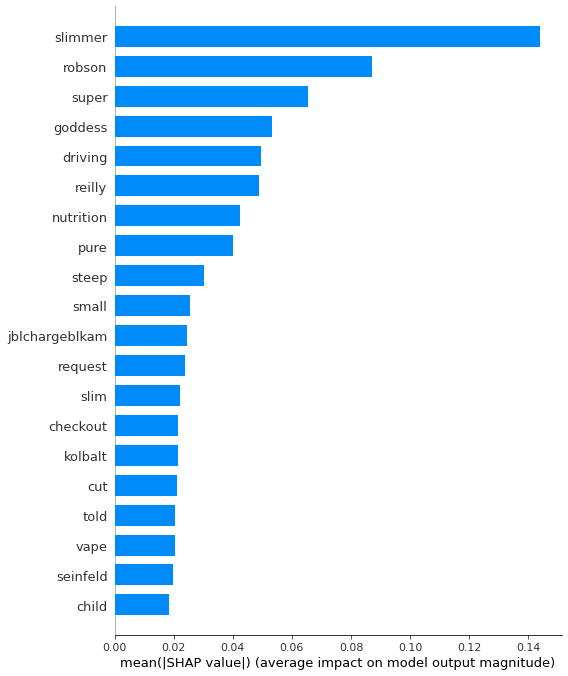

In [ ]:
color_test = pd.DataFrame(X_test_sample.todense())

shap.summary_plot(shap_values, color_test, feature_names=tfidf_vect.get_feature_names(), plot_type="bar")

From the above bar plot, we can see that slimmer feature has high importance with about 15 percentage.

# Test cases

In [ ]:
# Test queries

test_queries_list=['i have ordered the mobile phone a month ago, and i have not recieved it till now.',
                   'are there any offers or discounts avialable for this festive season.',
                   'When can I expect the extra large size of shirts to be available',
                   'which phone should I consider to buy either  samsung or apple',
                   'Can I expect this model of shirt in black color']

In [ ]:
test_queries_labels=['Shipping', 'Sales/Promotions', 'Product Availability', 'Product Comparison', 'Product Availability']

In [ ]:
category_id_df = df[['topic', 'category_id']].drop_duplicates().sort_values('category_id')

In [ ]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'topic']].values)

In [ ]:
id_to_category

{0: 'Sales/Promotions',
 1: 'Shipping',
 2: 'Product Availability',
 3: 'Product Specifications',
 4: 'Omnichannel',
 5: 'Product Comparison',
 6: 'Returns & Refunds'}

In [ ]:
test_df=pd.DataFrame()

In [ ]:
test_df['Test_queries']=test_queries_list
test_df['Test_labels']=test_queries_labels


In [ ]:
test_df['clean_test']=test_df['Test_queries'].apply(clean_text)

In [ ]:
test_df

,Test_queries,Test_labels,clean_test
0,"i have ordered the mobile phone a month ago, a...",Shipping,ordered mobile phone month ago recieved till
1,are there any offers or discounts avialable fo...,Sales/Promotions,offer discount avialable festive season
2,When can I expect the extra large size of shir...,Product Availability,expect extra large size shirt available
3,which phone should I consider to buy either s...,Product Comparison,phone consider buy either samsung apple
4,Can I expect this model of shirt in black color,Product Availability,expect model shirt black color


In [ ]:
test_queries_tfidf=tfidf_unigram.transform(test_df['clean_test'])
predictions= best_model.predict(test_queries_tfidf)



In [ ]:
def predictions_list(test_input):
  test_input=[test_input]
  test_query_tfidf=tfidf_unigram.transform(test_input)
  predictions = best_model.predict(test_query_tfidf)
  predicted_label= id_to_category[predictions[0]]
  return predicted_label

In [ ]:
test_df['predicted_labels']=test_df['clean_test'].apply(predictions_list)

In [ ]:
test_df

,Test_queries,Test_labels,clean_test,predicted_labels
0,"i have ordered the mobile phone a month ago, a...",Shipping,ordered mobile phone month ago recieved till,Product Specifications
1,are there any offers or discounts avialable fo...,Sales/Promotions,offer discount avialable festive season,Product Comparison
2,When can I expect the extra large size of shir...,Product Availability,expect extra large size shirt available,Shipping
3,which phone should I consider to buy either s...,Product Comparison,phone consider buy either samsung apple,Product Availability
4,Can I expect this model of shirt in black color,Product Availability,expect model shirt black color,Shipping


From the above results, we see that the predictions went completely wrong. This could be the due to overfitting in the model or improper training of the model.

# Results and Analysis

In [ ]:
Input_models=['Logistic_Regression_tfidf','Logistic_Regression_tfidfngram','Logistic_Regression_w2v','Logistic_Regression_d2v',
              'RandomForest_tfidf','RandomForest_tfidfn','RandomForest_w2v','RandomForest_d2v',
              'Adaboost_tfidf','Adaboost_tfidfn','Adaboost_w2v','Adaboost_d2v']

In [ ]:
scores_df=pd.DataFrame()
scores_df['Input_Models']=Input_models
scores_df['Precision_scores']=Precision

In [ ]:
scores_df

,Input_Models,Precision_scores
0,Logistic_Regression_tfidf,0.971708
1,Logistic_Regression_tfidfngram,0.923763
2,Logistic_Regression_w2v,0.777588
3,Logistic_Regression_d2v,0.618207
4,RandomForest_tfidf,0.974738
5,RandomForest_tfidfn,0.914792
6,RandomForest_w2v,0.874650
7,RandomForest_d2v,0.776687
8,Adaboost_tfidf,0.530310
9,Adaboost_tfidfn,0.877688


I have used Logistic Regression, Random Forest  Classifier and Adaboost Classifier.

As Random Forest Classifier is an ensemble of bagging methods which tries to reduce the high variance, I choose to build Adaboost method as it could reduce high bias.

Given the results I choose, Random Forest Classifier with tf-idf unigrams as best model with high weighted-precision score of 97%.

As classes "Omni Channel" and "Sales/Promotions" are low on total count, which denotes imbalance in the dataset, I chose weighted average of precision.



# Performance metrics and why Precision?

I considered 'Precision' as performance metric. As the dataset provided is customer query classification, the business applciation can possibly be allocating the service request to concerned department(eg: Sales/Promotions, Return & Refunds) based on question. So in such cases a misclassified query can result in allocating the query to improper team, which could further result in delay in response to the customer. As 'precision' tells about the proportion of predicted class to the actual class, I chose 'Precision to be the performance to evaluate the best model.